In [1]:
import gpxpy
import gpxpy.gpx
import folium
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from folium.vector_layers import Rectangle
from shapely.geometry import LineString
from shapely.ops import unary_union

In [2]:
import numpy as np
import gpxpy

gpx_file = open('/Users/ashwin/Desktop/wards and gps/fefa3de2-c689-4017-a629-baf7e68f5d69_493.gpx', 'r')
gpx = gpxpy.parse(gpx_file)
qt = []

for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            qt.append((point.latitude, point.longitude))

observations_array = np.array(qt)
# print(observations_array)
qt1 = observations_array[:75]
qt2 = observations_array[73:150]
qt3 = observations_array[148:200]
qt4 = observations_array[198:262]

In [47]:
import gpxpy

# Open the GPX file
gpx_file = open('/Users/ashwin/Desktop/wards and gps/fefa3de2-c689-4017-a629-baf7e68f5d69_493.gpx', 'r')

# Parse the GPX data
gpx = gpxpy.parse(gpx_file)

# Initialize variables to store start and end coordinates
start_point = None
end_point = None

# Iterate through track segments and waypoints
for track in gpx.tracks:
    for segment in track.segments:
        # Get the first point in the segment as start point
        if not start_point:
            start_point = segment.points[0]
        
        # Get the last point in the segment as end point
        end_point = segment.points[-1]

# Print the start and end coordinates
if start_point and end_point:
    print("Start coordinates: ({}, {})".format(start_point.latitude, start_point.longitude))
    print("End coordinates: ({}, {})".format(end_point.latitude, end_point.longitude))
else:
    print("No track data found in the GPX file.")


Start coordinates: (12.8850233, 77.6182517)
End coordinates: (12.931325, 77.6938449)


In [5]:
map_center1 = [gpx.tracks[0].segments[0].points[0].latitude, gpx.tracks[0].segments[0].points[0].longitude]
mymap1 = folium.Map(location=map_center1, zoom_start=12)

for track in gpx.tracks:
    for segment in track.segments:
        lat_lon_pairs1 = [(point.latitude, point.longitude) for point in segment.points[:75]]  
        folium.PolyLine(lat_lon_pairs1, color="blue", weight=2.5, opacity=1).add_to(mymap1)

mymap1


In [6]:
map_center2 = [gpx.tracks[0].segments[0].points[0].latitude, gpx.tracks[0].segments[0].points[0].longitude]
mymap2 = folium.Map(location=map_center2, zoom_start=12)

for track in gpx.tracks:
    for segment in track.segments:
        lat_lon_pairs2 = [(point.latitude, point.longitude) for point in segment.points[73:150]]  
        folium.PolyLine(lat_lon_pairs2, color="blue", weight=2.5, opacity=1).add_to(mymap2)

mymap2


In [7]:
map_center3 = [gpx.tracks[0].segments[0].points[0].latitude, gpx.tracks[0].segments[0].points[0].longitude]
mymap3 = folium.Map(location=map_center3, zoom_start=12)

for track in gpx.tracks:
    for segment in track.segments:
        lat_lon_pairs3 = [(point.latitude, point.longitude) for point in segment.points[148:200]]  
        folium.PolyLine(lat_lon_pairs3, color="blue", weight=2.5, opacity=1).add_to(mymap3)

mymap3

In [8]:
map_center4 = [gpx.tracks[0].segments[0].points[0].latitude, gpx.tracks[0].segments[0].points[0].longitude]
mymap4 = folium.Map(location=map_center4, zoom_start=12)

for track in gpx.tracks:
    for segment in track.segments:
        lat_lon_pairs4 = [(point.latitude, point.longitude) for point in segment.points[198:262]]  
        folium.PolyLine(lat_lon_pairs4, color="blue", weight=2.5, opacity=1).add_to(mymap4)

mymap4

In [9]:
all_points1 = []
for track in gpx.tracks:
    for segment in track.segments:
        all_points1.extend([(point.longitude, point.latitude) for point in segment.points[:75]]) 

route_line1 = LineString(all_points1)
buffer_distance1 = 0.001  
route_buffer1 = route_line1.buffer(buffer_distance1)
map_center1 = route_line1.centroid.coords[0][::-1] 
mymap1 = folium.Map(location=map_center1, zoom_start=14)
lat_lon_pairs1 = [(point[1], point[0]) for point in route_line1.coords]
folium.PolyLine(lat_lon_pairs1, color="blue", weight=2.5, opacity=1).add_to(mymap1)
route_buffer_geojson1 = route_buffer1.__geo_interface__
folium.GeoJson(route_buffer_geojson1, name='geofence').add_to(mymap1)
mymap1


In [25]:
all_points2 = []
for track in gpx.tracks:
    for segment in track.segments:
        all_points2.extend([(point.longitude, point.latitude) for point in segment.points[73:150]]) 

route_line2 = LineString(all_points2)
buffer_distance2 = 0.001  
route_buffer2 = route_line2.buffer(buffer_distance2)
map_center2 = route_line2.centroid.coords[0][::-1] 
mymap2 = folium.Map(location=map_center2, zoom_start=14)
lat_lon_pairs2 = [(point[1], point[0]) for point in route_line2.coords]
folium.PolyLine(lat_lon_pairs2, color="blue", weight=2.5, opacity=1).add_to(mymap2)
route_buffer_geojson2 = route_buffer2.__geo_interface__
folium.GeoJson(route_buffer_geojson2, name='geofence').add_to(mymap2)
mymap2

In [11]:
all_points3 = []
for track in gpx.tracks:
    for segment in track.segments:
        all_points3.extend([(point.longitude, point.latitude) for point in segment.points[148:200]]) 

route_line3 = LineString(all_points3)
buffer_distance3 = 0.001  
route_buffer3 = route_line3.buffer(buffer_distance3)
map_center3 = route_line3.centroid.coords[0][::-1] 
mymap3 = folium.Map(location=map_center3, zoom_start=14)
lat_lon_pairs3 = [(point[1], point[0]) for point in route_line3.coords]
folium.PolyLine(lat_lon_pairs3, color="blue", weight=2.5, opacity=1).add_to(mymap3)
route_buffer_geojson3 = route_buffer3.__geo_interface__
folium.GeoJson(route_buffer_geojson3, name='geofence').add_to(mymap3)
mymap3


In [12]:
all_points4 = []
for track in gpx.tracks:
    for segment in track.segments:
        all_points4.extend([(point.longitude, point.latitude) for point in segment.points[198:262]]) 

route_line4 = LineString(all_points4)
buffer_distance4 = 0.001  
route_buffer4 = route_line4.buffer(buffer_distance4)
map_center4 = route_line4.centroid.coords[0][::-1] 
mymap4 = folium.Map(location=map_center4, zoom_start=14)
lat_lon_pairs4 = [(point[1], point[0]) for point in route_line4.coords]
folium.PolyLine(lat_lon_pairs4, color="blue", weight=2.5, opacity=1).add_to(mymap4)
route_buffer_geojson4 = route_buffer4.__geo_interface__
folium.GeoJson(route_buffer_geojson4, name='geofence').add_to(mymap4)
mymap4


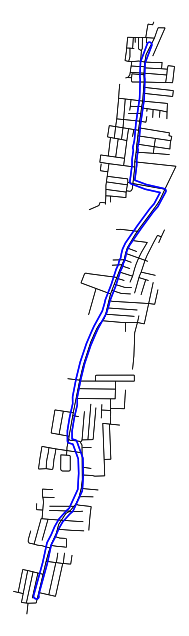

In [13]:
import osmnx as ox
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
route_polygon1 = route_buffer1.convex_hull
G1 = ox.graph_from_polygon(route_polygon1, network_type='drive')
fig1, ax1 = ox.plot_graph(G1, bgcolor='w', edge_color='k', edge_linewidth=0.5, node_size=0, show=False, close=False)
route_line_buffer1 = route_line1.buffer(0.0001)  
ax1.plot(*route_line_buffer1.exterior.xy, color='blue', linewidth=1)
ax1.plot(*route_line_buffer1.exterior.xy[:75], color='blue', linewidth=1)
plt.show()


In [17]:
import osmnx as ox
import numpy as np
from shapely.geometry import LineString
route_polygon1 = route_buffer1.convex_hull
G1 = ox.graph_from_polygon(route_polygon1, network_type='drive')
states1 = np.array([(data1['y'], data1['x']) for node, data1 in G1.nodes(data=True)])
print("Number of nodes:", len(states1))
print("Node coordinates:")
for node in states1:
    print(node)

Number of nodes: 306
Node coordinates:
[12.884756  77.6182356]
[12.8976788 77.6214247]
[12.9030173 77.6242333]
[12.9014205 77.6212131]
[12.9031245 77.621357 ]
[12.9029845 77.6224649]
[12.9057409 77.6228028]
[12.9032018 77.6224637]
[12.9022951 77.6223827]
[12.9020556 77.6237565]
[12.9046252 77.6226375]
[12.9042657 77.6240541]
[12.9065083 77.6240868]
[12.9065383 77.622868 ]
[12.907075  77.6238595]
[12.9071314 77.6228682]
[12.9071907 77.6241673]
[12.9072226 77.6238942]
[12.8847458 77.6178862]
[12.8864994 77.6186611]
[12.8885985 77.6196781]
[12.8888902 77.6199368]
[12.8891955 77.6200754]
[12.8895451 77.6201664]
[12.891604  77.6196319]
[12.8933031 77.6199444]
[12.8850346 77.619064 ]
[12.8850731 77.6188888]
[12.8850981 77.6187751]
[12.8851927 77.6183449]
[12.886385  77.6196602]
[12.88641   77.6193739]
[12.8864457 77.6190791]
[12.8974069 77.6213564]
[12.8983689 77.6216958]
[12.8972782 77.6230609]
[12.8991078 77.6220104]
[12.8990969 77.6215224]
[12.9035053 77.623958 ]
[12.9036063 77.6225222]
[

In [23]:
import numpy as np
from math import exp, sqrt, pi

pairwise_distances1 = []
for i in range(len(qt1) - 1):
    x1, y1 = qt1[i]
    x2, y2 = qt1[i + 1]
    distance = sqrt((x2 - x1)**2 + (y2 - y1)**2)
    pairwise_distances1.append(distance)
TRANS1 = np.zeros((len(states1), len(states1), len(qt1)-1))

beta = 0.95  

n1 = len(states1)
for k in range(len(qt1)-1):
    for i in range(n1):
        for j in range(n1):
            xtemp1 = np.linalg.norm(states1[i] - states1[j])
            dij1 = abs(xtemp1 - pairwise_distances1[k])
            TRANS1[i, j, k] = (1 / beta) * exp(-dij1 / beta)
        TRANS1[i, :, k] = TRANS1[i, :, k] / np.sum(TRANS1[i, :, k])

sigztemp1 = []
for i in range(len(qt1)):
    for j in range(len(states1)):
        sigztemp1.append(np.linalg.norm(qt1[i] - states1[j]))
sigz1 = 1.4 * np.median(sigztemp1)

EMIS1 = np.zeros((len(states1), len(qt1)))
for i in range(len(qt1)):
    for j in range(len(states1)):
        EMIS1[j, i] = (1 / (sqrt(2 * pi) * sigz1)) * exp(-0.5 * ((np.linalg.norm(qt1[i] - states1[j])) / sigz1) ** 2)

# seq = [1, 2, 3, 4]
seq1 = np.arange(1, len(qt1)+1)

PRIOR1 = np.array([(1 / len(states1))] * len(states1))
# PRIOR[358] = 0.7

T1 = len(seq1)  # Number of observations
n1 = EMIS1.shape[0]  # Number of states

score1 = np.zeros((n1, T1))
pred1 = np.zeros((n1, T1))

for i in range(n1):
    score1[i, 0] = PRIOR1[i] * EMIS1[i, seq1[0] - 1]

for t in range(1, T1):
    for j in range(n1):
        tscore1 = np.zeros(n1)
        for k in range(n1):
            tscore1[k] = score1[k, t - 1] * TRANS1[k, j, t - 1] * EMIS1[j, seq1[t] - 1]
        score1[j, t] = np.max(tscore1)
        id1 = np.where(tscore1 == np.max(tscore1))[0][0]
        pred1[j, t] = id1

IT1 = np.zeros(T1, dtype=int)
IT1[-1] = np.argmax(score1[:, -1])

for t in range(T1 - 1, 0, -1):
    IT1[t - 1] = int(pred1[IT1[t], t])

print(IT1)

[293 293 293 138 294 142 168 199 200 146 208  20  23  87  87  74  24  72
  64 288 288 288  63  25  25  25  67  52  53  53  50  50 123  33  33 100
  91  91 102  96  96  36  45  45 298 106   9   9   9   8   8 103   5   7
   7  39  39  39  39  39  41  41  41  42 150 150 111 276 276 223 273 273
 183 270 270]


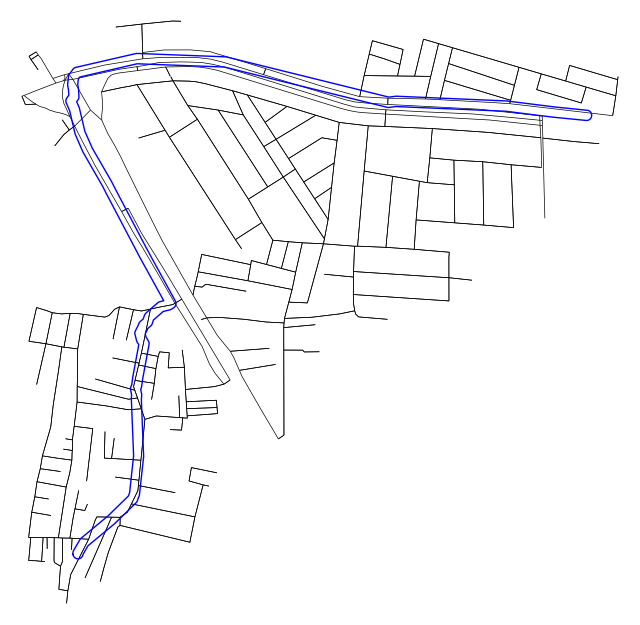

In [26]:
import osmnx as ox
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
route_polygon2 = route_buffer2.convex_hull
G2 = ox.graph_from_polygon(route_polygon2, network_type='drive')
fig2, ax2 = ox.plot_graph(G2, bgcolor='w', edge_color='k', edge_linewidth=0.5, node_size=0, show=False, close=False)
route_line_buffer2 = route_line2.buffer(0.0001)  
ax2.plot(*route_line_buffer2.exterior.xy, color='blue', linewidth=1)
ax2.plot(*route_line_buffer2.exterior.xy[73:150], color='blue', linewidth=1)
plt.show()


In [27]:
import osmnx as ox
import numpy as np
from shapely.geometry import LineString
route_polygon2 = route_buffer2.convex_hull
G2 = ox.graph_from_polygon(route_polygon2, network_type='drive')
states2 = np.array([(data2['y'], data2['x']) for node, data2 in G2.nodes(data=True)])
print("Number of nodes:", len(states2))
print("Node coordinates:")
for node in states2:
    print(node)

Number of nodes: 281
Node coordinates:
[12.9176822 77.6243834]
[12.9147868 77.6240948]
[12.9160375 77.6334544]
[12.9145922 77.6323754]
[12.9175235 77.6248374]
[12.9166108 77.6292106]
[12.9163717 77.6291947]
[12.9141678 77.6269691]
[12.9171824 77.6242671]
[12.9140012 77.6263477]
[12.9141783 77.6262246]
[12.914509  77.6267505]
[12.9161622 77.6249126]
[12.9165111 77.625469 ]
[12.9172556 77.6249821]
[12.9164496 77.6282878]
[12.9163831 77.6288648]
[12.9170632 77.6261679]
[12.9140978 77.6279751]
[12.9169816 77.6264616]
[12.9145698 77.6280676]
[12.9155462 77.6274158]
[12.9153907 77.627176 ]
[12.9149618 77.626482 ]
[12.9167763 77.6252775]
[12.9165947 77.6263805]
[12.9166892 77.6258808]
[12.9151999 77.6268673]
[12.9159809 77.6267886]
[12.9161225 77.6270328]
[12.91645   77.6268151]
[12.9167596 77.6272497]
[12.9157491 77.627281 ]
[12.9161026 77.6282458]
[12.9140523 77.6286535]
[12.91344   77.6304686]
[12.9135605 77.6285734]
[12.9161458 77.6323351]
[12.9160778 77.632965 ]
[12.9133923 77.6309261]
[

In [31]:
import numpy as np
from math import exp, sqrt, pi

pairwise_distances2 = []
for i in range(len(qt2) - 1):
    x1, y1 = qt2[i]
    x2, y2 = qt2[i + 1]
    distance = sqrt((x2 - x1)**2 + (y2 - y1)**2)
    pairwise_distances2.append(distance)
TRANS2 = np.zeros((len(states2), len(states2), len(qt2)-1))

beta = 0.95  

n2 = len(states2)
for k in range(len(qt2)-1):
    for i in range(n2):
        for j in range(n2):
            xtemp2 = np.linalg.norm(states2[i] - states2[j])
            dij2 = abs(xtemp2 - pairwise_distances2[k])
            TRANS2[i, j, k] = (1 / beta) * exp(-dij2 / beta)
        TRANS2[i, :, k] = TRANS2[i, :, k] / np.sum(TRANS2[i, :, k])

sigztemp2 = []
for i in range(len(qt2)):
    for j in range(len(states2)):
        sigztemp2.append(np.linalg.norm(qt2[i] - states2[j]))
sigz2 = 1.4 * np.median(sigztemp2)

EMIS2 = np.zeros((len(states2), len(qt2)))
for i in range(len(qt2)):
    for j in range(len(states2)):
        EMIS2[j, i] = (1 / (sqrt(2 * pi) * sigz2)) * exp(-0.5 * ((np.linalg.norm(qt2[i] - states2[j])) / sigz2) ** 2)

# seq = [1, 2, 3, 4]
seq2 = np.arange(1, len(qt2)+1)

PRIOR2 = np.array([(1 / len(states2))] * len(states2))
# PRIOR[358] = 0.7

T2 = len(seq2)  # Number of observations
n2 = EMIS2.shape[0]  # Number of states

score2 = np.zeros((n2, T2))
pred2 = np.zeros((n2, T2))

for i in range(n2):
    score2[i, 0] = PRIOR2[i] * EMIS2[i, seq2[0] - 1]

for t in range(1, T2):
    for j in range(n2):
        tscore2 = np.zeros(n2)
        for k in range(n2):
            tscore2[k] = score2[k, t - 1] * TRANS2[k, j, t - 1] * EMIS2[j, seq2[t] - 1]
        score2[j, t] = np.max(tscore2)
        id2 = np.where(tscore2 == np.max(tscore2))[0][0]
        pred2[j, t] = id2

IT2 = np.zeros(T2, dtype=int)
IT2[-1] = np.argmax(score2[:, -1])

for t in range(T2 - 1, 0, -1):
    IT2[t - 1] = int(pred2[IT2[t], t])

print(IT2)

[247 247  97 117 129 129 177 208 208 208 208 207 207 207 207 207 198 165
 165 165 165 204 204 204 205 205 205 205 205 205  64  64  64  64 191 191
   1  94  94 231 231 231 132 108 108 134 265 265 265 265 265 265 265 265
 265 265 265 265 265 265 265 265 265 265 265 265 133 265   0  17 107 106
  82  92 276 277  38]


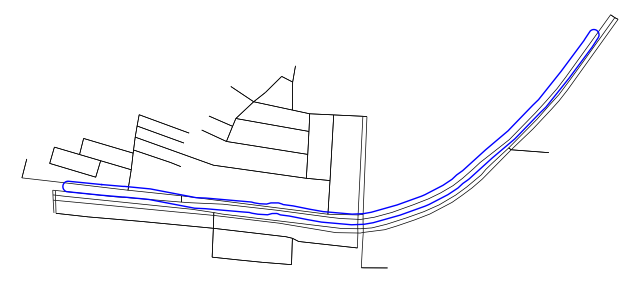

In [15]:
import osmnx as ox
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
route_polygon3 = route_buffer3.convex_hull
G3 = ox.graph_from_polygon(route_polygon3, network_type='drive')
fig3, ax3 = ox.plot_graph(G3, bgcolor='w', edge_color='k', edge_linewidth=0.5, node_size=0, show=False, close=False)
route_line_buffer3 = route_line3.buffer(0.0001)  
ax3.plot(*route_line_buffer3.exterior.xy, color='blue', linewidth=1)
ax3.plot(*route_line_buffer3.exterior.xy[148:200], color='blue', linewidth=1)
plt.show()


In [19]:
import osmnx as ox
import numpy as np
from shapely.geometry import LineString
route_polygon3 = route_buffer3.convex_hull
G3 = ox.graph_from_polygon(route_polygon3, network_type='drive')
states3 = np.array([(data3['y'], data3['x']) for node, data3 in G3.nodes(data=True)])
print("Number of nodes:", len(states3))
print("Node coordinates:")
for node in states3:
    print(node)

Number of nodes: 74
Node coordinates:
[12.9172868 77.641843 ]
[12.9151811 77.6368786]
[12.9153217 77.6353468]
[12.915224 77.636324]
[12.915268  77.6358679]
[12.9160375 77.6334544]
[12.9161458 77.6323351]
[12.9160778 77.632965 ]
[12.9169653 77.6337861]
[12.9198251 77.6431146]
[12.9173754 77.6410678]
[12.9198785 77.6430337]
[12.9174969 77.6356227]
[12.9187202 77.6366886]
[12.9172538 77.6371917]
[12.9182437 77.6361483]
[12.9175785 77.6338629]
[12.9168043 77.6371645]
[12.9186139 77.6369007]
[12.916762  77.6376209]
[12.9172777 77.6338233]
[12.9171679 77.6317711]
[12.9168783 77.6316951]
[12.9168122 77.6316777]
[12.9178909 77.6339189]
[12.9165801 77.6337236]
[12.9157863 77.638262 ]
[12.9161603 77.6353796]
[12.9161285 77.6375803]
[12.9161156 77.6381623]
[12.9179644 77.6383333]
[12.9161066 77.6353786]
[12.9197934 77.6431776]
[12.9173407 77.6411162]
[12.915677  77.6368946]
[12.9176853 77.6372145]
[12.9179286 77.6358046]
[12.9184201 77.6363776]
[12.9185958 77.6365596]
[12.9154942 77.6381487]
[12.

In [29]:
import numpy as np
from math import exp, sqrt, pi

pairwise_distances3 = []
for i in range(len(qt3) - 1):
    x1, y1 = qt3[i]
    x2, y2 = qt3[i + 1]
    distance = sqrt((x2 - x1)**2 + (y2 - y1)**2)
    pairwise_distances3.append(distance)
TRANS3 = np.zeros((len(states3), len(states3), len(qt3)-1))

beta = 0.95  

n3 = len(states3)
for k in range(len(qt3)-1):
    for i in range(n3):
        for j in range(n3):
            xtemp3 = np.linalg.norm(states3[i] - states3[j])
            dij3 = abs(xtemp3 - pairwise_distances3[k])
            TRANS3[i, j, k] = (1 / beta) * exp(-dij3 / beta)
        TRANS3[i, :, k] = TRANS3[i, :, k] / np.sum(TRANS3[i, :, k])

sigztemp3 = []
for i in range(len(qt3)):
    for j in range(len(states3)):
        sigztemp3.append(np.linalg.norm(qt3[i] - states3[j]))
sigz3 = 1.4 * np.median(sigztemp3)

EMIS3 = np.zeros((len(states3), len(qt3)))
for i in range(len(qt3)):
    for j in range(len(states3)):
        EMIS3[j, i] = (1 / (sqrt(2 * pi) * sigz3)) * exp(-0.5 * ((np.linalg.norm(qt3[i] - states3[j])) / sigz3) ** 2)

# seq = [1, 2, 3, 4]
seq3 = np.arange(1, len(qt3)+1)

PRIOR3 = np.array([(1 / len(states3))] * len(states3))
# PRIOR[358] = 0.7

T3 = len(seq3)  # Number of observations
n3 = EMIS3.shape[0]  # Number of states

score3 = np.zeros((n3, T3))
pred3 = np.zeros((n3, T3))

for i in range(n3):
    score3[i, 0] = PRIOR3[i] * EMIS3[i, seq3[0] - 1]

for t in range(1, T3):
    for j in range(n3):
        tscore3 = np.zeros(n3)
        for k in range(n3):
            tscore3[k] = score3[k, t - 1] * TRANS3[k, j, t - 1] * EMIS3[j, seq3[t] - 1]
        score3[j, t] = np.max(tscore3)
        id3 = np.where(tscore3 == np.max(tscore3))[0][0]
        pred3[j, t] = id3

IT3 = np.zeros(T3, dtype=int)
IT3[-1] = np.argmax(score3[:, -1])

for t in range(T3 - 1, 0, -1):
    IT3[t - 1] = int(pred3[IT3[t], t])

print(IT3)

[71  7 25 25 25 52 27 27 27 27 34 34 34 34 34 34 34 34 34 34 34 34 34 28
 28 28 28 29 66 66 66 66 66 10 10 10 10 10 10 10 10 10 10 10  0  0  0  0
 11 11 11 11]


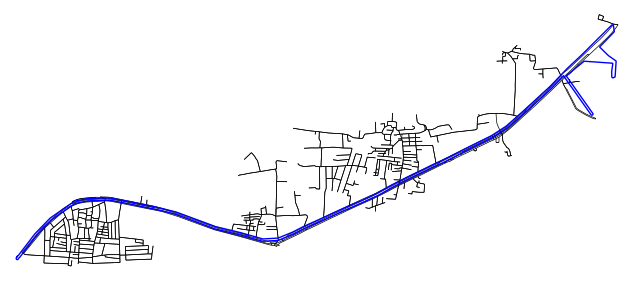

In [16]:
import osmnx as ox
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
route_polygon4 = route_buffer4.convex_hull
G4 = ox.graph_from_polygon(route_polygon4, network_type='drive')
fig4, ax4 = ox.plot_graph(G4, bgcolor='w', edge_color='k', edge_linewidth=0.5, node_size=0, show=False, close=False)
route_line_buffer = route_line4.buffer(0.0001)  
ax4.plot(*route_line_buffer.exterior.xy, color='blue', linewidth=1)
ax4.plot(*route_line_buffer.exterior.xy[198:262], color='blue', linewidth=1)
plt.show()


In [20]:
import osmnx as ox
import numpy as np
from shapely.geometry import LineString
route_polygon4 = route_buffer4.convex_hull
G4 = ox.graph_from_polygon(route_polygon4, network_type='drive')
states4 = np.array([(data4['y'], data4['x']) for node, data4 in G4.nodes(data=True)])
print("Number of nodes:", len(states4))
print("Node coordinates:")
for node in states4:
    print(node)

Number of nodes: 533
Node coordinates:
[12.9209256 77.6655498]
[12.9230168 77.6653306]
[12.9231317 77.664071 ]
[12.923117  77.6630484]
[12.9230102 77.6623099]
[12.9226787 77.6515237]
[12.919575  77.6454813]
[12.9237805 77.6659947]
[12.9221699 77.6630406]
[12.918953  77.6492598]
[12.9194764 77.649235 ]
[12.9239957 77.649786 ]
[12.9225543 77.6497307]
[12.9219107 77.6496931]
[12.9207019 77.6493922]
[12.9194627 77.6471863]
[12.9187741 77.6470906]
[12.9190163 77.6511675]
[12.9196705 77.6521539]
[12.91908   77.6479903]
[12.9190278 77.6516519]
[12.930536  77.6758978]
[12.9303496 77.6761242]
[12.9300138 77.6762316]
[12.9296986 77.6764008]
[12.929517  77.6764153]
[12.9280487 77.6765419]
[12.9300291 77.6764347]
[12.930452  77.6785911]
[12.927028  77.6652842]
[12.9229309 77.6468724]
[12.9210077 77.6474063]
[12.9199334 77.6472629]
[12.922423  77.6505891]
[12.9224442 77.650475 ]
[12.9210743 77.6506474]
[12.9210288 77.6515866]
[12.9210477 77.6512497]
[12.921058  77.6509332]
[12.9224777 77.6508982]
[

In [30]:
import numpy as np
from math import exp, sqrt, pi

pairwise_distances4 = []
for i in range(len(qt4) - 1):
    x1, y1 = qt4[i]
    x2, y2 = qt4[i + 1]
    distance = sqrt((x2 - x1)**2 + (y2 - y1)**2)
    pairwise_distances4.append(distance)
TRANS4 = np.zeros((len(states4), len(states4), len(qt4)-1))

beta = 0.95  

n4 = len(states4)
for k in range(len(qt4)-1):
    for i in range(n4):
        for j in range(n4):
            xtemp4 = np.linalg.norm(states4[i] - states4[j])
            dij4 = abs(xtemp4 - pairwise_distances4[k])
            TRANS4[i, j, k] = (1 / beta) * exp(-dij4 / beta)
        TRANS4[i, :, k] = TRANS4[i, :, k] / np.sum(TRANS4[i, :, k])

sigztemp4 = []
for i in range(len(qt4)):
    for j in range(len(states4)):
        sigztemp4.append(np.linalg.norm(qt4[i] - states4[j]))
sigz4 = 1.4 * np.median(sigztemp4)

EMIS4 = np.zeros((len(states4), len(qt4)))
for i in range(len(qt4)):
    for j in range(len(states4)):
        EMIS4[j, i] = (1 / (sqrt(2 * pi) * sigz4)) * exp(-0.5 * ((np.linalg.norm(qt4[i] - states4[j])) / sigz4) ** 2)

# seq = [1, 2, 3, 4]
seq4 = np.arange(1, len(qt4)+1)

PRIOR4 = np.array([(1 / len(states4))] * len(states4))
# PRIOR[358] = 0.7

T4 = len(seq4)  # Number of observations
n4 = EMIS4.shape[0]  # Number of states

score4 = np.zeros((n4, T4))
pred4 = np.zeros((n4, T4))

for i in range(n4):
    score4[i, 0] = PRIOR4[i] * EMIS4[i, seq4[0] - 1]

for t in range(1, T4):
    for j in range(n4):
        tscore4 = np.zeros(n4)
        for k in range(n4):
            tscore4[k] = score4[k, t - 1] * TRANS4[k, j, t - 1] * EMIS4[j, seq4[t] - 1]
        score4[j, t] = np.max(tscore4)
        id4 = np.where(tscore4 == np.max(tscore4))[0][0]
        pred4[j, t] = id4

IT4 = np.zeros(T4, dtype=int)
IT4[-1] = np.argmax(score4[:, -1])

for t in range(T4 - 1, 0, -1):
    IT4[t - 1] = int(pred4[IT4[t], t])

print(IT4)

[ 75  77  77  77  77  77  77  77  77  77  77 311 317 121 128 126 104 368
 454 354  90 124 304 106 100 495 532 141 363 433  83 227 506 324 284 127
 442 498 248 111  89 362 361  96 511 509 117 437 356 117 437 509 509 509
 509 509 509 510 507 507 507 365 365 365]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


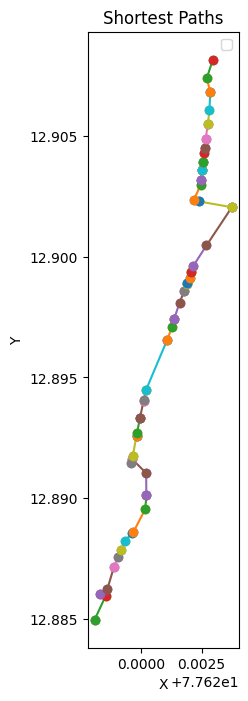

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


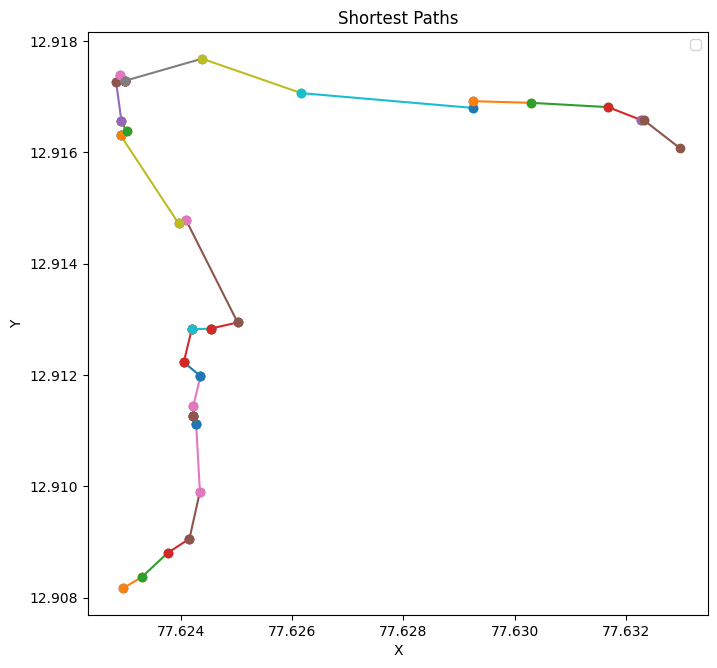

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


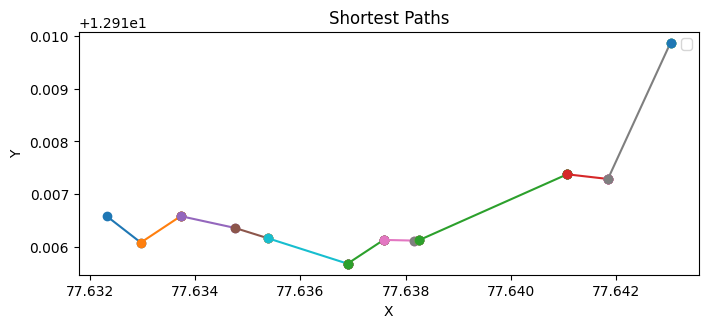

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


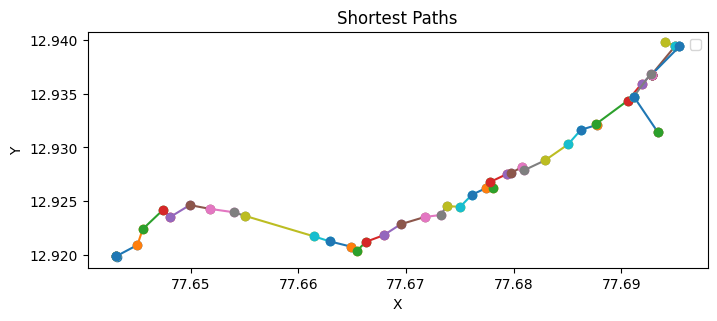

In [33]:
import networkx as nx
import matplotlib.pyplot as plt

def display_shortest_paths(paths, states):
    fig, ax = plt.subplots(figsize=(8, 8))  # Adjust figure size for better visualization
    for i, path in enumerate(paths):
        path_coordinates = [states[i] for i in path]
        x, y = zip(*path_coordinates)
        ax.plot(y, x, marker='o')  # Plot each path separately with a label
    ax.set_aspect('equal')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title('Shortest Paths')
    ax.legend()  # Show legend to differentiate between paths
    plt.show()

# Define the function to process shortest paths
def process_shortest_paths(IT, states):
    G = nx.Graph()
    for i in range(len(IT) - 1):
        G.add_edge(IT[i], IT[i + 1])
    shortest_paths = [nx.shortest_path(G, IT[i], IT[i + 1]) for i in range(len(IT) - 1)]
    display_shortest_paths(shortest_paths, states)

# Call the function for each case
process_shortest_paths(IT1, states1)
process_shortest_paths(IT2, states2)
process_shortest_paths(IT3, states3)
process_shortest_paths(IT4, states4)


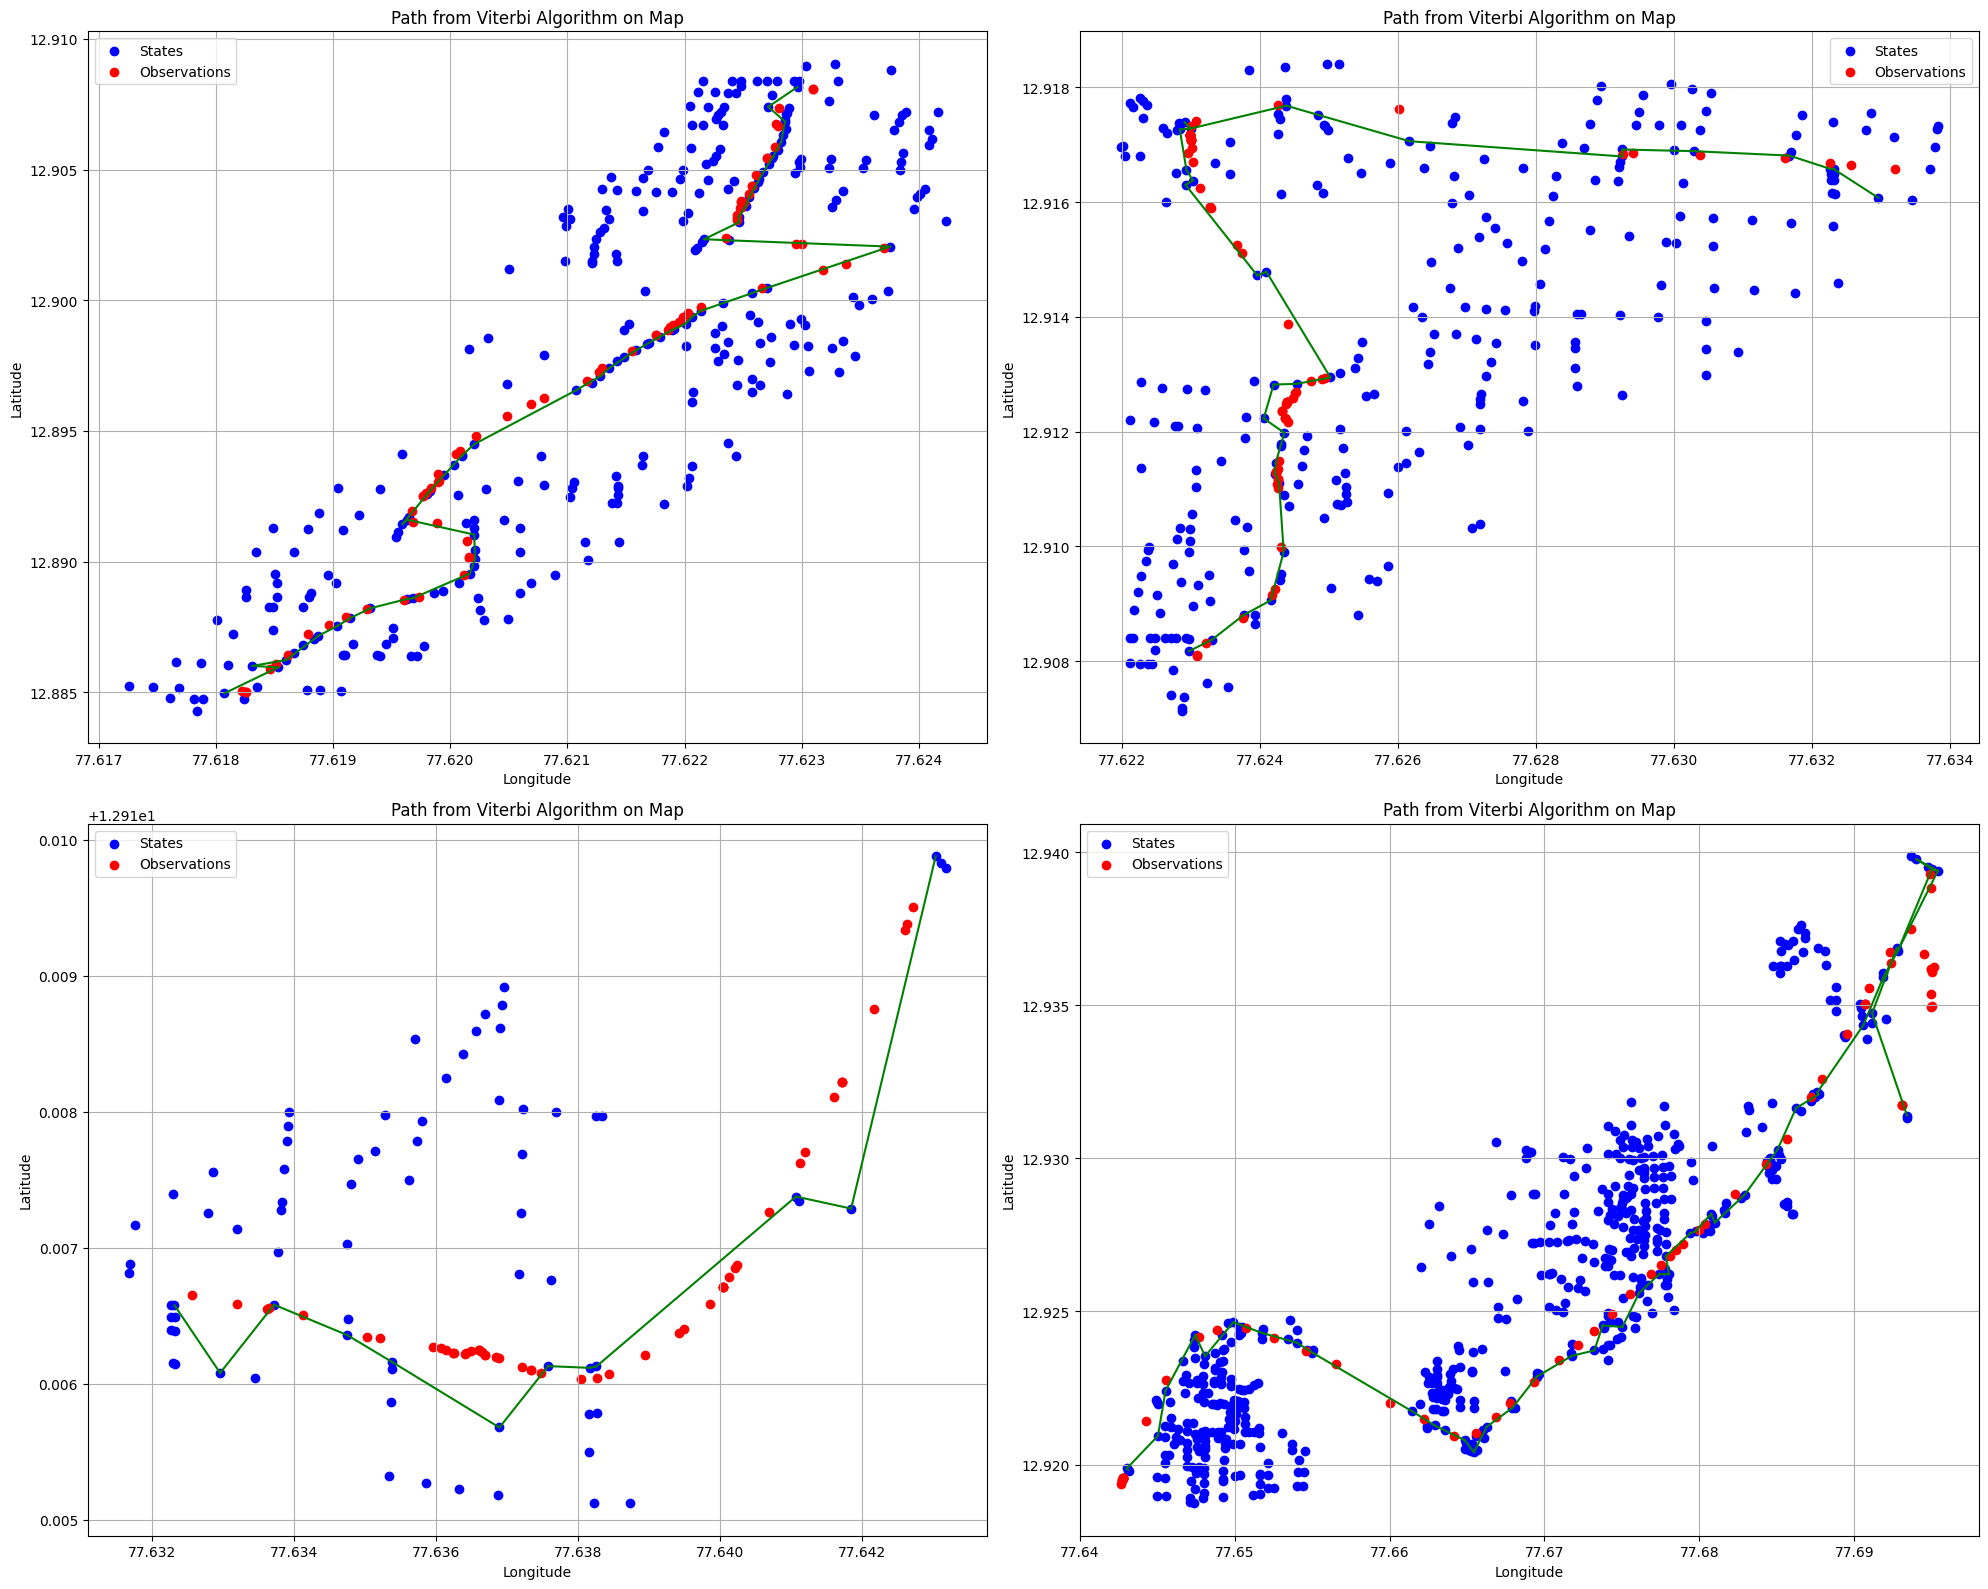

In [35]:
import matplotlib.pyplot as plt

# Define a function to plot paths
def plot_path(states, qt, IT):
    plt.scatter(states[:, 1], states[:, 0], color='blue', label='States')
    plt.scatter(qt[:, 1], qt[:, 0], color='red', label='Observations')
    for i in range(len(IT) - 1):
        start_point = states[IT[i]]
        end_point = states[IT[i + 1]]
        plt.plot([start_point[1], end_point[1]], [start_point[0], end_point[0]], color='green')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Path from Viterbi Algorithm on Map')
    plt.legend()
    plt.grid(True)

# Combine all states and observations
all_states = [states1, states2, states3, states4]
all_qt = [qt1, qt2, qt3, qt4]
all_IT = [IT1, IT2, IT3, IT4]

# Create a single plot
plt.figure(figsize=(20, 16))

# Plot each path and accumulate the plot information
for i in range(4):
    plt.subplot(2, 2, i+1)
    plot_path(all_states[i], all_qt[i], all_IT[i])

plt.tight_layout()
plt.show()


In [37]:
coordinates_IT1 = states1[IT1]
coordinates_IT2 = states2[IT2]
coordinates_IT3 = states3[IT3]
coordinates_IT4 = states4[IT4]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


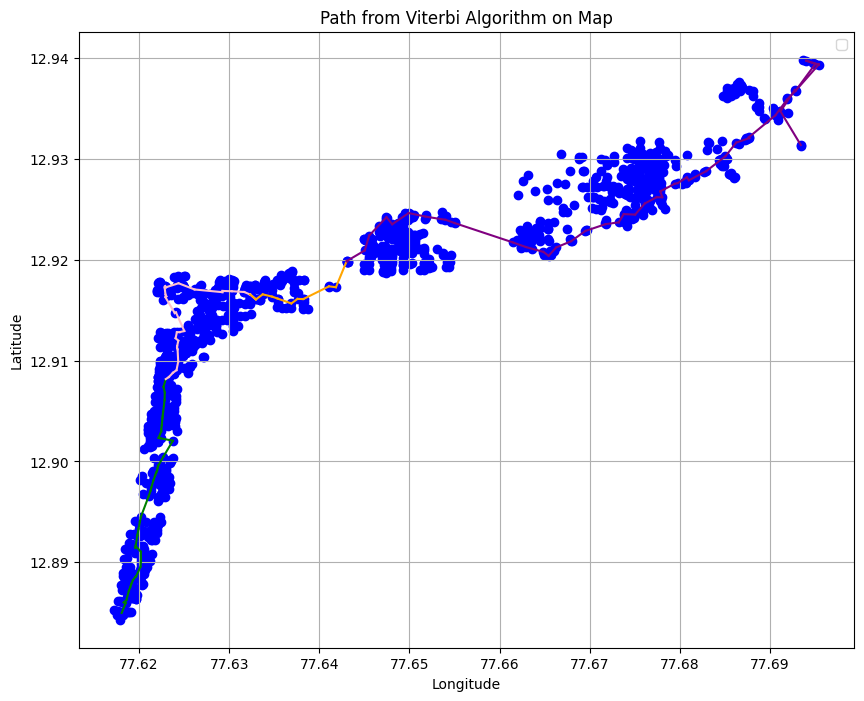

In [42]:
import matplotlib.pyplot as plt
def plot_paths(states, qt, IT, color):
    plt.scatter(states[:, 1], states[:, 0], color='blue')
    # plt.scatter(qt[:, 1], qt[:, 0], color='red')
    for i in range(len(IT) - 1):
        start_point = states[IT[i]]
        end_point = states[IT[i + 1]]
        plt.plot([start_point[1], end_point[1]], [start_point[0], end_point[0]], color=color)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title('Path from Viterbi Algorithm on Map')
    plt.legend()
    plt.grid(True)
plt.figure(figsize=(10, 8))
plot_paths(states1, qt1, IT1, 'green')
plot_paths(states2, qt2, IT2, 'pink')
plot_paths(states3, qt3, IT3, 'orange')
plot_paths(states4, qt4, IT4, 'purple')
plt.show()


In [59]:
import folium

def add_path_to_map(map_obj, states, IT, color):
    coordinates = [[state[0], state[1]] for state in states]
    for i in range(len(IT) - 1):
        start_point = states[IT[i]]
        end_point = states[IT[i + 1]]
        folium.PolyLine(locations=[(start_point[0], start_point[1]), (end_point[0], end_point[1])], color=color).add_to(map_obj)

# Create a Folium map centered at a certain location
mymap = folium.Map(location=[states1[0][0], states1[0][1]], zoom_start=12)

# Add paths to the map
add_path_to_map(mymap, states1, IT1, 'green')
add_path_to_map(mymap, states2, IT2, 'blue')
add_path_to_map(mymap, states3, IT3, 'orange')
add_path_to_map(mymap, states4, IT4, 'purple')

# Save the map as an HTML file
mymap


In [56]:
import folium
import gpxpy

# Load GPX file
gpx_file = '/Users/ashwin/Desktop/other gpx/mapstogpx20240515_094446.gpx'
with open(gpx_file, 'r') as f:
    gpx = gpxpy.parse(f)

# Extract waypoints or route data from GPX
points = []
for track in gpx.tracks:
    for segment in track.segments:
        for point in segment.points:
            points.append([point.latitude, point.longitude])

# Create a Folium map centered at the first point of the GPX data
mymap = folium.Map(location=[points[0][0], points[0][1]], zoom_start=14)

# Add GPX data to the map as a PolyLine
folium.PolyLine(locations=points, color='red').add_to(mymap)

# Display the map
mymap
